In [1]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
G = nx.read_gml('dolphins.gml') # definimos la red:cada nodo es un delfin y cada conexion representa una interaccion

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

dolphinsGender=ldata('dolphinsGender.txt') # usamos la funcion "ldata" para abrir el archivo .txt 

In [4]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}
for n in G.nodes:
    G.nodes[n]["gender"] = dict_gender[n] 

# PARTICION EN CLUSTERS

In [5]:
import community
dict_comun_louvain = community.best_partition(G)
labels_louvain=list(dict_comun_louvain.values())

In [6]:
comunidades=[dict_comun_louvain] #adentro de la lista v an todos los diccionarios

In [7]:
def AssingCommunities(G,comunidades): #comunidades=lista de diccionarios de comunidades
    for n in G.nodes():
        G.nodes[n]['comunidad_louvain']=comunidades[0][n]
        #aca seguimos escribiendo las otras comunidades

In [8]:
AssingCommunities(G,comunidades)

In [9]:
name_coms=['comunidad_louvain']
labels=['labels_louvain']

In [10]:
def Communities(G,labels): #laabels=lista de labels de comunidades
    Communities=[]
    for k in range(len(labels)):
        nodos_por_comunidad=[]
        for i in range(len(set(labels[k]))):
            nodos=[]
            for j in range(len(list(G.nodes()))):
                if i==list(nx.get_node_attributes(G,name_coms[k]).items())[j][1]:
                    nodos.append(list(G.nodes())[j])
            nodos_por_comunidad.append(nodos)
        Communities.append(nodos_por_comunidad)
    return(Communities)

In [11]:
Communities=Communities(G,labels) #esto va adentro de modularity...lista de listas jaja

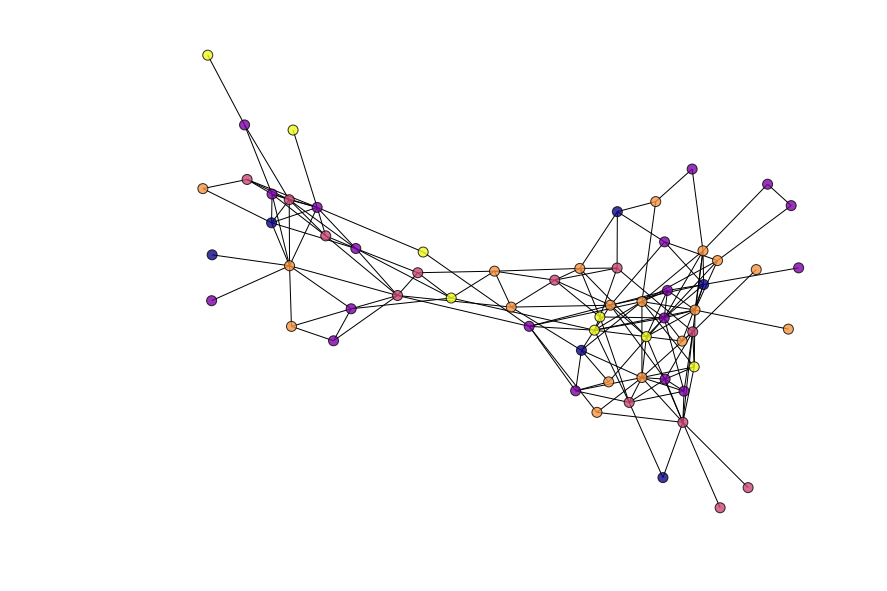

In [12]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(dict(nx.get_node_attributes(G,name_coms[0])).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

nx.draw_networkx_edges(G,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

In [13]:
nx.double_edge_swap(G,nswap=2)

In [14]:
from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']

class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [15]:
M=len(list(G.edges()))

nx.double_edge_swap(G,nswap=int(M/2-1))

DistributionModularity = []                          # Vector para guardar las modularidades de cada iteracion

 
it = 2                                           # numero de iteraciones 
swaps = 70
Grafo = G.copy()                      

for i in range(90):
    Grafo = nx.read_gml('dolphins.gml')
    GrafoRecabled = nx.double_edge_swap(Grafo,nswap=77)                                      # recableamos
#     DistributionModularity.append(modularity(GrafoRecabled,Communities,weight='weight')) 
#     Grafo=[]

NetworkXAlgorithmError: Maximum number of swap attempts (100) exceeded before desired swaps achieved (78).